## Hopper Puzzle

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
clues = pd.read_csv('puzzle.csv', header = None)
clues.columns = ['A','B']

  ### EDA  

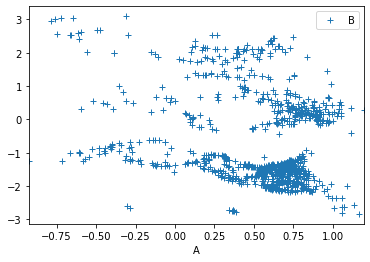

In [3]:
clues.plot(x='A', y='B', style='+')

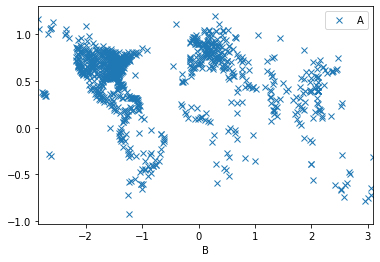

In [4]:
clues.plot(x='B', y='A', style='x')
##looks roughly like a world map

In [5]:
clues.describe()

,A,B
count,1024.000000,1024.000000
mean,0.504729,-0.388165
std,0.355107,1.499346
min,-0.925070,-2.837888
25%,0.389721,-1.559228
50%,0.591392,-1.129903
75%,0.746583,0.578621
max,1.195399,3.096964


In [6]:
clues.A.value_counts().head(5)

 0.397150    101
 1.067695      2
-0.065909      2
-0.388084      2
 0.719915      2
Name: A, dtype: int64

In [7]:
clues.B.value_counts().head(5)

 2.113629    101
-0.151519      2
-0.672521      2
 0.408607      2
 0.047801      2
Name: B, dtype: int64

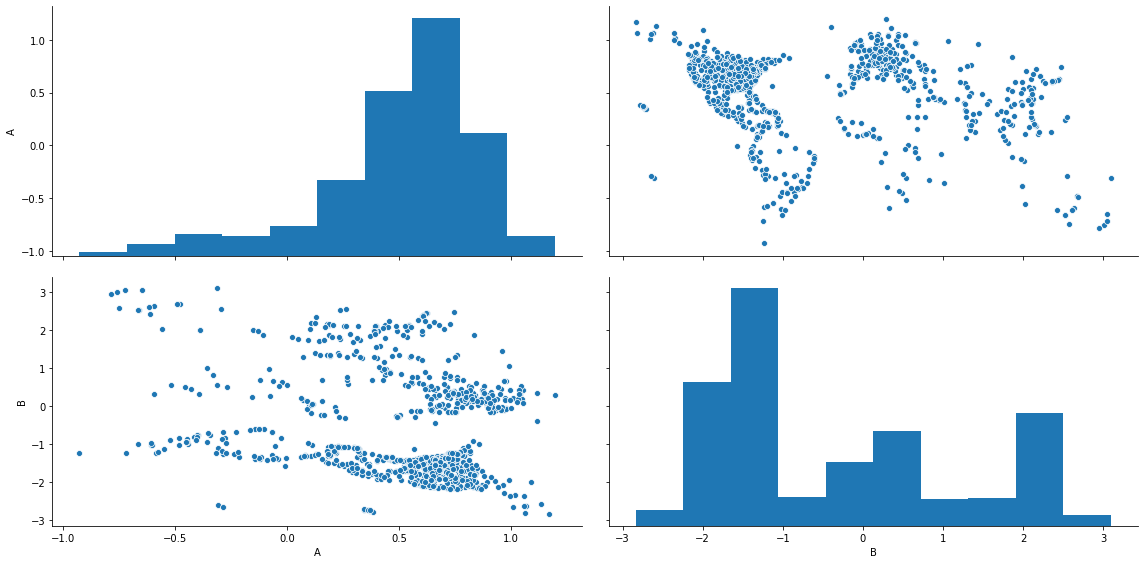

In [8]:
#plot pairwise
sns.pairplot(clues,height=4, aspect=2)

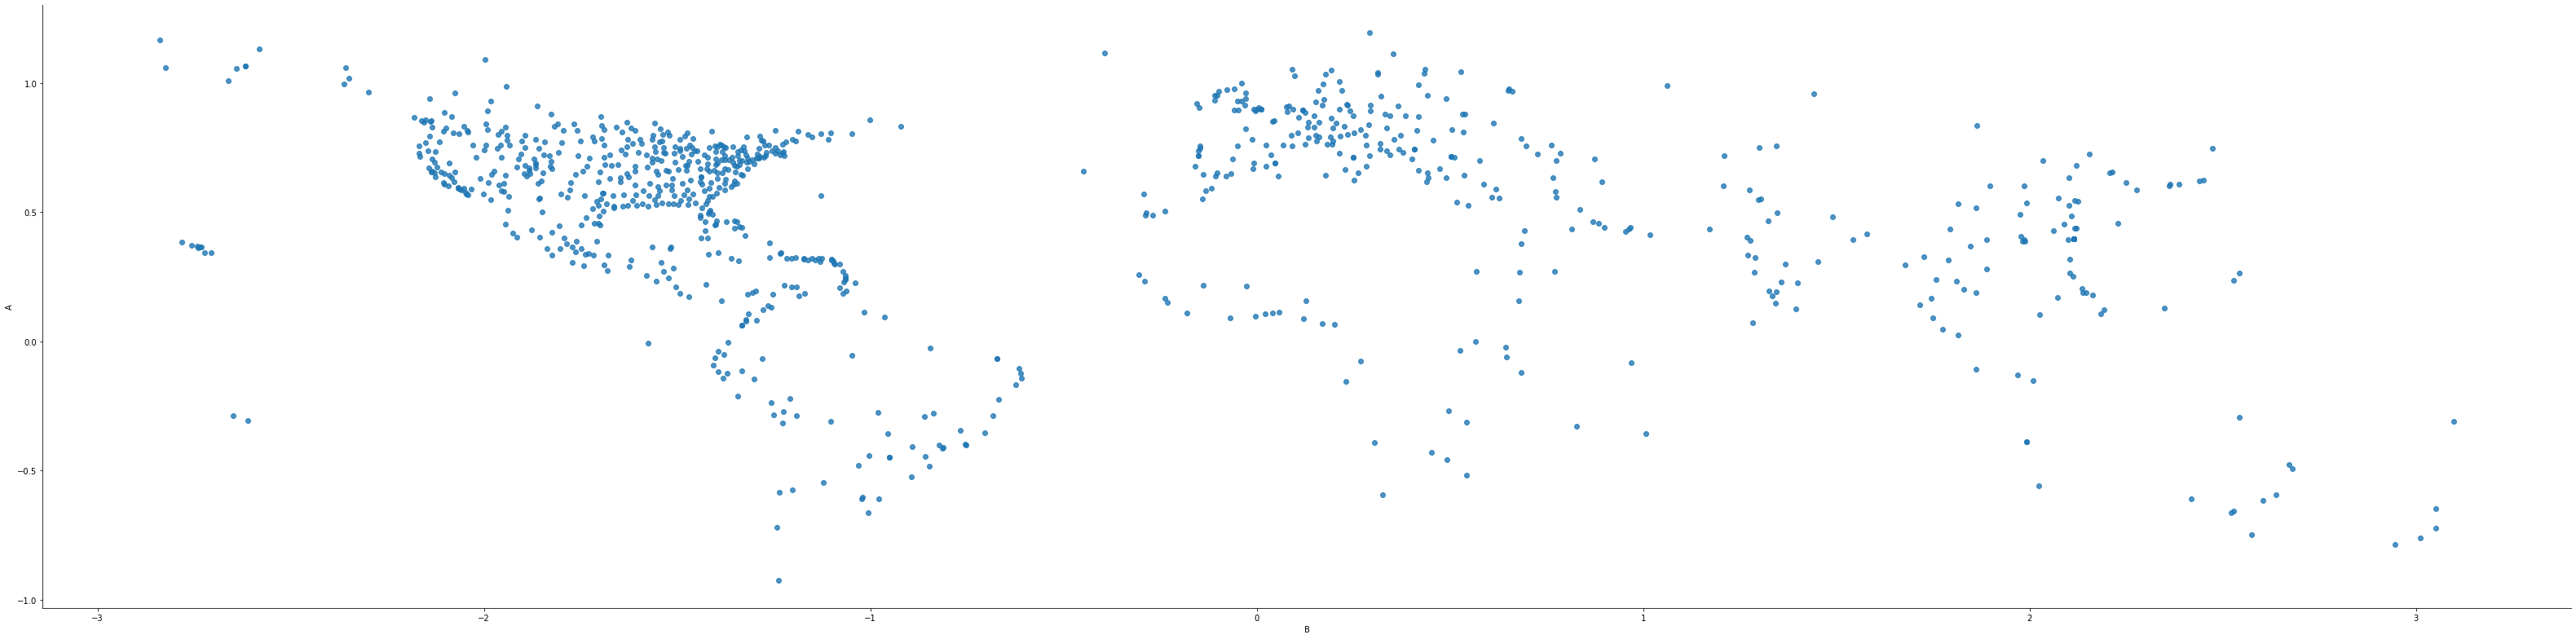

In [9]:
sns.lmplot(x="B", y="A", data=clues, height=11, fit_reg=False, aspect=4)

In [10]:
##rename columns to latitude and longitude, drop dupes
clues_unique = clues.drop_duplicates(subset=['A', 'B'], keep="first")
clues_unique = clues_unique.reset_index(drop=True)
clues_unique.columns = ["LAT","LONG"]

In [11]:
#convert coordinates to degrees lat and long
import math
clues_unique['LAT'] = clues_unique['LAT']*180/math.pi
clues_unique['LONG'] = clues_unique['LONG']*180/math.pi

In [12]:
clues_unique.head()

,LAT,LONG
0,22.755002,121.101998
1,55.437196,-5.686388
2,3.543223,-76.381600
3,41.248103,-8.681388
4,43.512902,43.636603


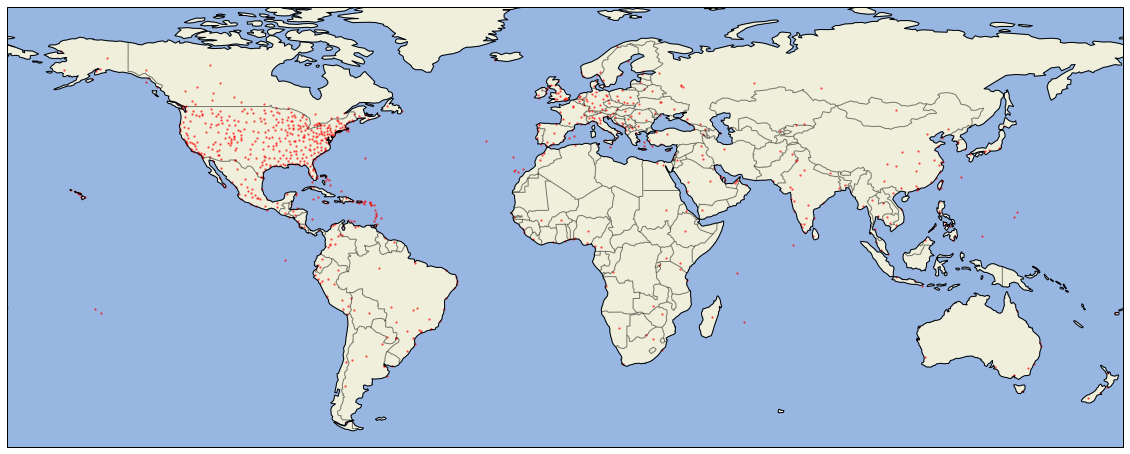

In [28]:
## use cartopy module to plot map overlay
import matplotlib.pyplot as plt
import cartopy
fig, ax = plt.subplots(figsize=(20,20))
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
ax.set_extent([-150, 60, -25, 60])
ax.scatter(clues_unique['LONG'], clues_unique['LAT'],c='red', alpha=0.5, s=2)

In [15]:
clues.columns = ["LAT","LONG"]
clues['LAT'] = clues['LAT']*180/math.pi
clues['LONG'] = clues['LONG']*180/math.pi

### Final dataframe with origin/destination pairs

In [16]:
##first 50% are origin city/airport, paired with last 50% to create flight path
origin = clues[:int(len(clues)*.5)]
destination = clues[int(len(clues)*.5):]
destination = destination.reset_index(drop=True)

In [17]:
origin['d_LAT'] = destination['LAT']
origin['d_LONG'] = destination['LONG']

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Plotting first 50 trips

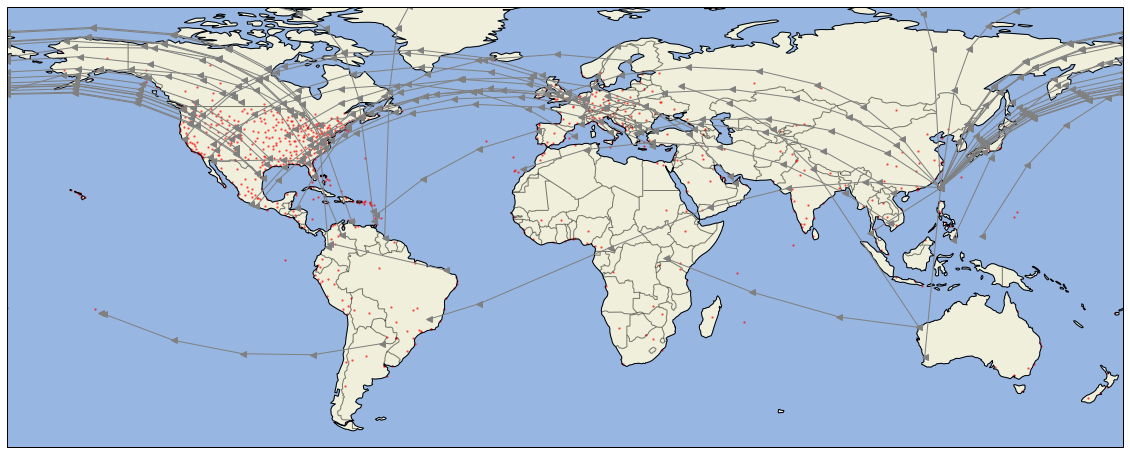

In [38]:
import matplotlib.pyplot as plt
import cartopy
fig, ax = plt.subplots(figsize=(20,20))
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
ax.set_extent([-150, 60, -25, 60])
ax.scatter(clues_unique['LONG'], clues_unique['LAT'],c='red', alpha=0.5, s=2)

##too cluttered to plot all trips
for i, row in origin[:50].iterrows():
    plt.plot([origin.LONG[i], origin.d_LONG[i]], [origin.LAT[i], origin.d_LAT[i]],
         color='grey', linewidth=1, marker='<',
         transform=cartopy.crs.Geodetic(),
         )